# ***Data Mining I***

## ***Homewok 1***




***Question 1***

In [102]:
install.packages("ISLR2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [103]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [104]:
library(ISLR2)
library(caret)

In [105]:
set.seed(155)

In [106]:
data("College")
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [107]:
dim(College)

[1] 777  18

In [108]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

**(a) Split the data set into a training set and a test set. Fit a linear model using least squares on the training set, and report the test error obtained. **

In [109]:
a <- createDataPartition(College$Apps, p = 0.8, list = FALSE)
train_set <- College[a,]
test_set <- College[-a,]

In [110]:
dim(train_set)

[1] 624  18

In [111]:
dim(test_set)

[1] 153  18

In [112]:
#Pre-Processing
b <- preProcess(train_set, method = c('center', 'scale'))
train_set <- predict(b , train_set)
test_set <- predict(b , test_set)
y_train <- train_set$Apps
y_test <- test_set$Apps
encode <- dummyVars(Apps ~ ., data = train_set)
x_train <- predict(encode, train_set)
x_test <- predict(encode, test_set)

In [113]:
#linear model
linear <- lm(Apps ~ ., data = train_set)
summary(linear)


Call:
lm(formula = Apps ~ ., data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.31877 -0.11048 -0.00609  0.08097  1.97719 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.082028   0.030694   2.672 0.007732 ** 
PrivateYes  -0.111759   0.039221  -2.849 0.004528 ** 
Accept       1.007486   0.027162  37.092  < 2e-16 ***
Enroll      -0.180871   0.047345  -3.820 0.000147 ***
Top10perc    0.216455   0.028914   7.486 2.51e-13 ***
Top25perc   -0.064283   0.025875  -2.484 0.013248 *  
F.Undergrad  0.051221   0.043312   1.183 0.237429    
P.Undergrad  0.020936   0.013976   1.498 0.134658    
Outstate    -0.084784   0.021979  -3.858 0.000127 ***
Room.Board   0.035820   0.015507   2.310 0.021226 *  
Books        0.005321   0.011342   0.469 0.639147    
Personal    -0.005294   0.012315  -0.430 0.667437    
PhD         -0.041159   0.021728  -1.894 0.058671 .  
Terminal    -0.007512   0.021272  -0.353 0.724098    
S.F.Ratio    0.008218  

In [114]:
pred <- predict(linear, test_set)
summary(pred)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.93054 -0.54573 -0.28542  0.01205  0.19851  4.51449 

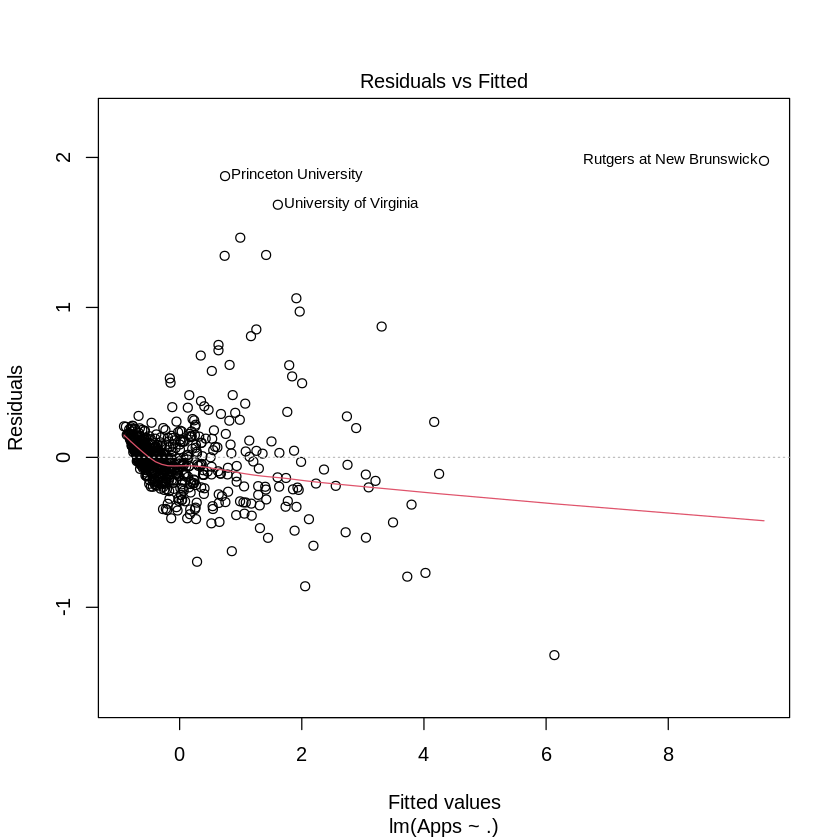

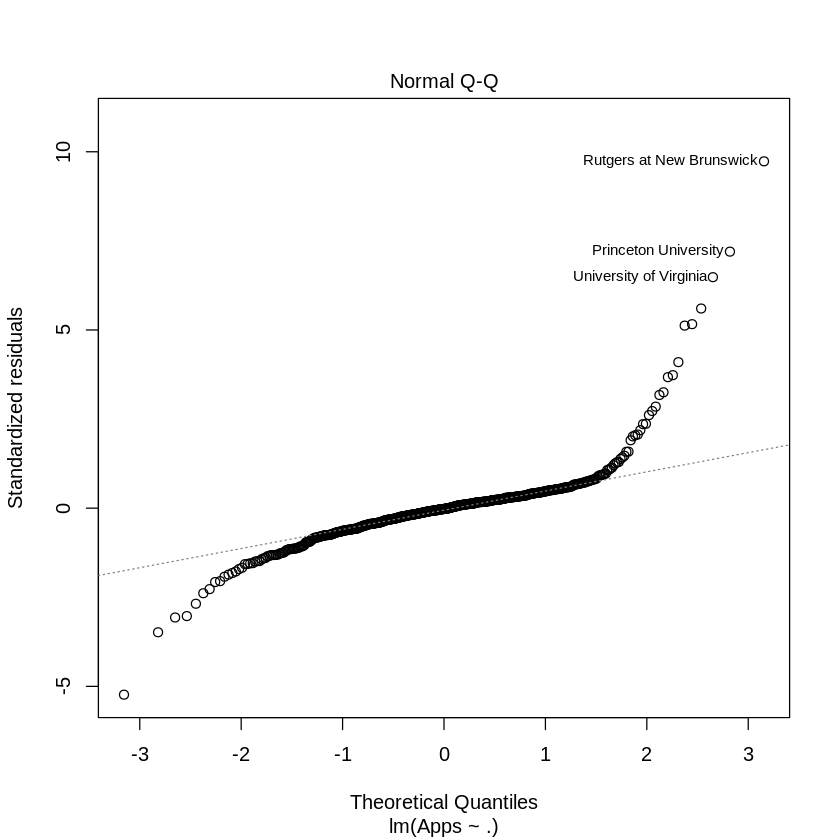

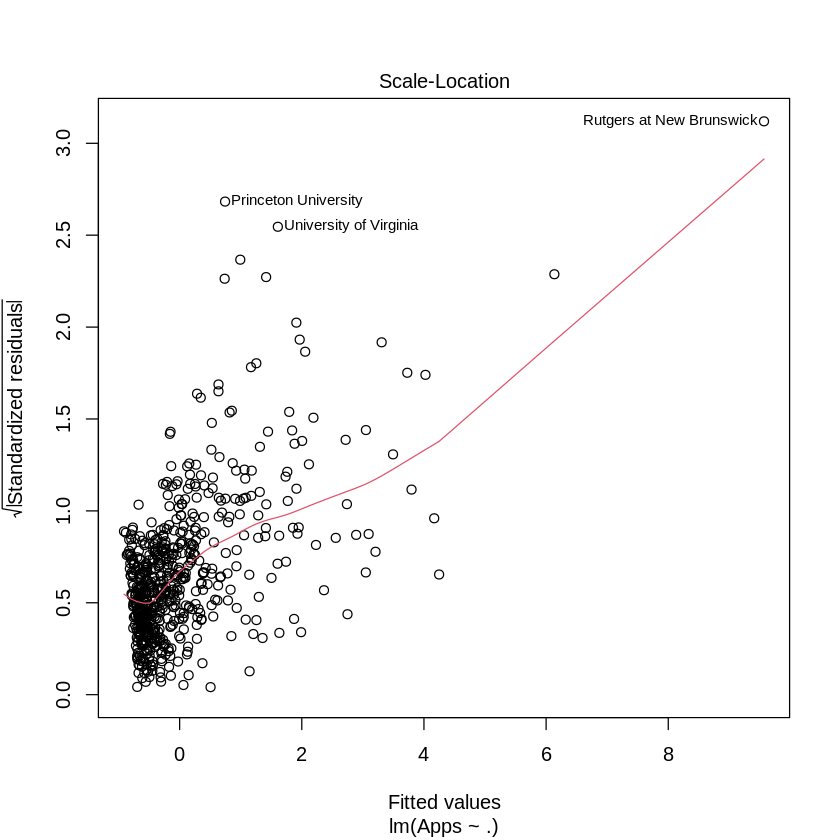

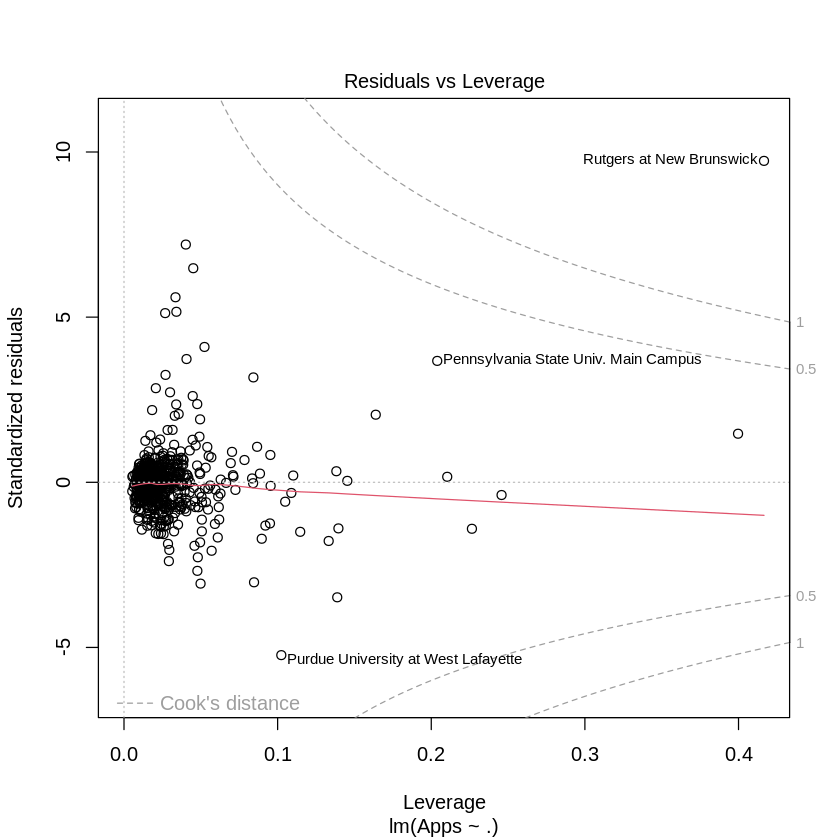

In [115]:
plot(linear)

In [116]:
# To report the test error obtained for linear regression
linear_info <- postResample(pred, test_set$Apps)
linear_info

RMSE  Rsquared       MAE 
0.2710375 0.9189494 0.1580350

The R-squared error for the linear regreesion is 0.918949364695584

***(b) Fit a ridge regression model on the training set, with λ chosen by cross validation. Report the test error obtained.***

In [117]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [118]:
#ridge regression
ridge_reg <- train(x = x_train, y = y_train, method = 'glmnet', trcontrol = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 0, lambda = seq(0, 10e2, length.out = 20)))
summary(ridge_reg)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


            Length Class      Mode     
a0           100   -none-     numeric  
beta        1800   dgCMatrix  S4       
df           100   -none-     numeric  
dim            2   -none-     numeric  
lambda       100   -none-     numeric  
dev.ratio    100   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
call           6   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        18   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      1   -none-     logical  
param          1   -none-     list     

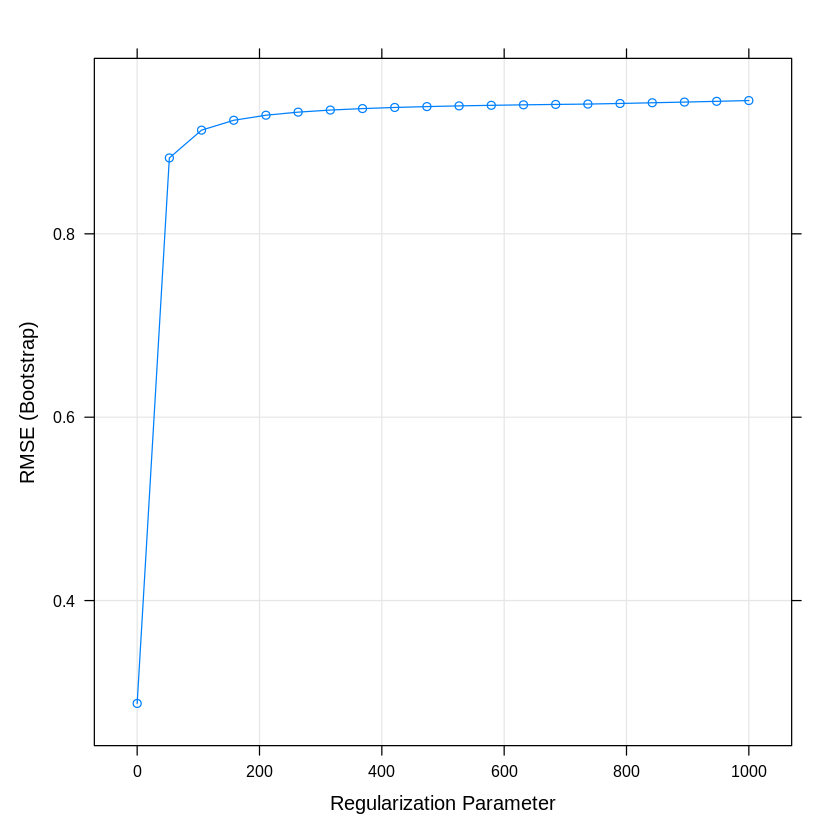

In [119]:
plot(ridge_reg)

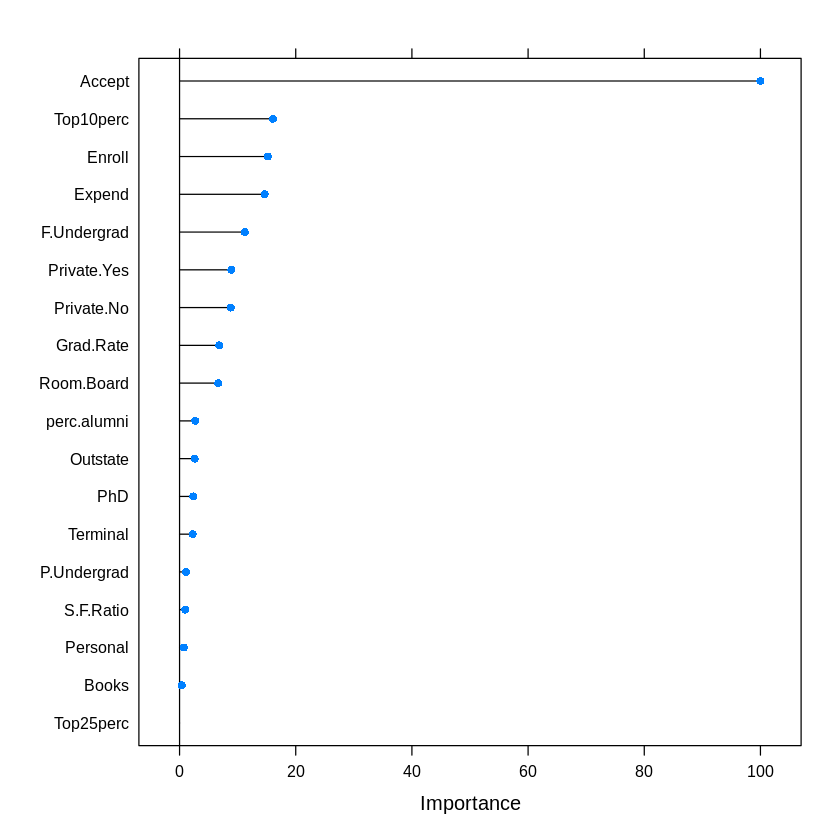

In [120]:
plot(varImp(ridge_reg))

In [121]:
# To report the test error obtained for ridge regression
ridge_info <- postResample(predict(ridge_reg, x_test),y_test)
ridge_info

RMSE  Rsquared       MAE 
0.2856586 0.9097226 0.1724608

The R-squared error for ridge regression is 0.909722600212093

**(d) Fit a lasso model on the training set, with λ chosen by cross-validation.Report the test error obtained, along with the number of non-zero coefficient 
estimates.** 

In [122]:
# lasso model
lasso_mod <- train(x = x_train, y = y_train, method = 'glmnet', trcontrol = trainControl(method = 'cv', number = 10), tuneGrid = expand.grid(alpha = 1, lambda = seq(0.0001, 1, length.out = 50)))
summary(lasso_mod)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


            Length Class      Mode     
a0            82   -none-     numeric  
beta        1476   dgCMatrix  S4       
df            82   -none-     numeric  
dim            2   -none-     numeric  
lambda        82   -none-     numeric  
dev.ratio     82   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
call           6   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        18   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      1   -none-     logical  
param          1   -none-     list     

In [123]:
coef(lasso_mod$finalModel, lasso_mod$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -2.926706e-02
Private.No   1.100160e-01
Private.Yes -3.950184e-14
Accept       9.991360e-01
Enroll      -1.557693e-01
Top10perc    2.084188e-01
Top25perc   -5.736809e-02
F.Undergrad  3.362972e-02
P.Undergrad  2.059726e-02
Outstate    -8.198781e-02
Room.Board   3.493133e-02
Books        4.853165e-03
Personal    -4.366040e-03
PhD         -4.017896e-02
Terminal    -7.090738e-03
S.F.Ratio    7.633350e-03
perc.alumni  .           
Expend       9.731869e-02
Grad.Rate    3.264986e-02

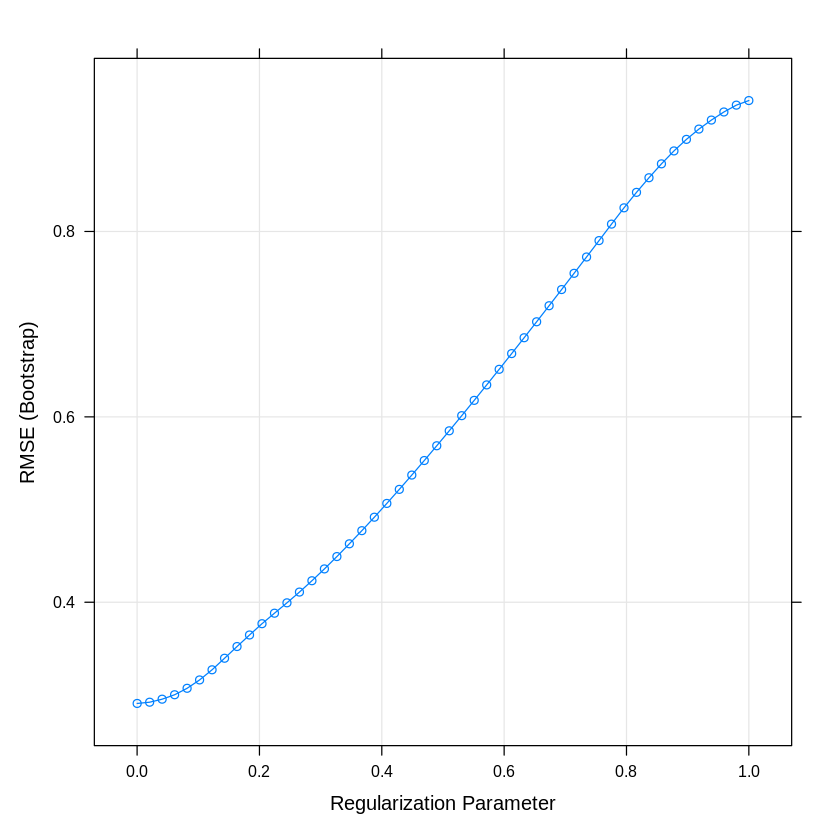

In [124]:
plot(lasso_mod)

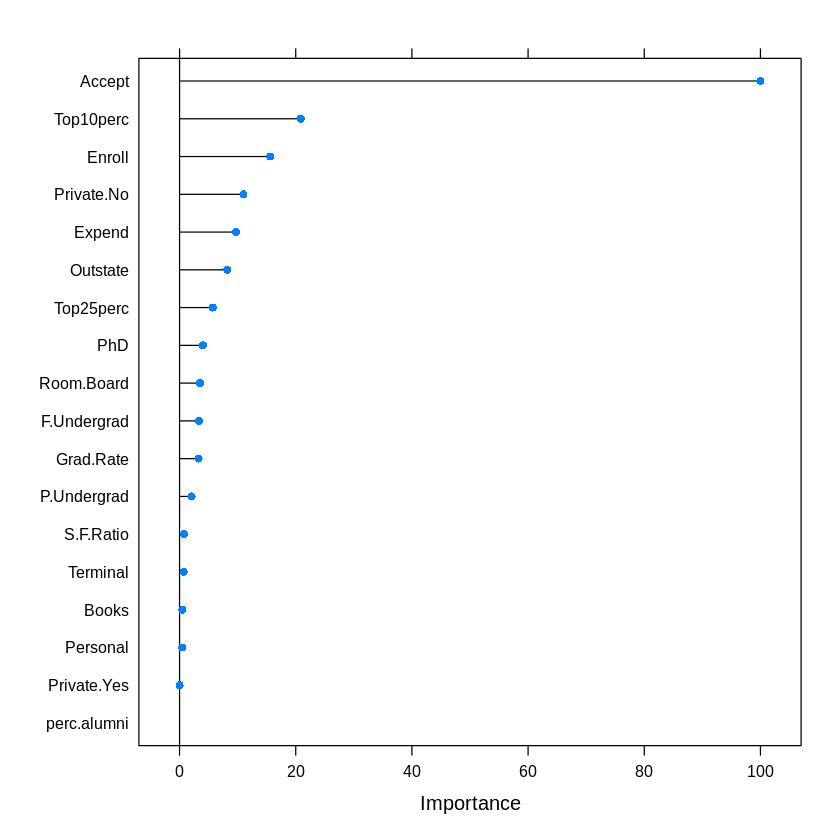

In [125]:
plot(varImp(lasso_mod))

In [126]:
# To report the test error obtained for lasso model
lasso_info <- postResample(predict(lasso_mod, x_test), y_test)
lasso_info

RMSE  Rsquared       MAE 
0.2719461 0.9183910 0.1579144

The R-squared error for lasso model is 0.901076110866006. <br>
There are 12 non zero coefficient in lasso model.

**(g) Comment more generally on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these three approaches? **

model---------------RMSE------------------Rsquared-----------------------------MAE<br>
linear----0.271037465136337---0.918949364695584---0.158035028364091 <br>
Ridge----0.271946055367312---0.918390983317102---0.172460813535994 <br>
Lasso----0.271946055367312---0.918390983317102---0.157914415735213

The models linear regression, ridge redression and lasso model all perform almost similar to each other. All these models have great accuracy.

### **Question 2**

**The insurance company benchmark data set gives information on customers.Specifically, it contains 86 variables on product-usage data and socio demographic data derived from zip area codes. There are 5,822 customers in the training set and another 4,000 in the test set. The data were collected to answer the following questions: Can you predict who will be interested in buying a caravan insurance policy and give an explanation why? Compute the OLS estimates and compare them with those obtained from the following variable selection algorithms: Forwards Selection, Backwards Selection,Lasso regression, and Ridge regression.What methods performed the best in the prediction?**

In [151]:
library(leaps)
set.seed(155)
a <-  read.table("C:/Users/Sanjay/Documents/ticdata2000.txt")
b <- read.table("C:/Users/Sanjay/Documents/ticeval2000.txt")

In [144]:
head(a)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,3,2,8,0,5,1,3,7,⋯,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,1,4,1,4,6,⋯,0,0,0,1,0,0,0,0,0,0
3,37,1,2,2,8,0,4,2,4,3,⋯,0,0,0,1,0,0,0,0,0,0
4,9,1,3,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
5,40,1,4,2,10,1,4,1,4,7,⋯,0,0,0,1,0,0,0,0,0,0
6,23,1,2,1,5,0,5,0,5,0,⋯,0,0,0,0,0,0,0,0,0,0


In [145]:
head(b)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,4,2,8,0,6,0,3,5,⋯,0,0,0,0,1,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,⋯,2,0,0,0,1,0,0,0,0,0
3,39,1,3,3,9,1,4,2,3,5,⋯,1,0,0,0,1,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,0,1,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,0,1,0,0,0,0,0
6,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,0,2,0,0,0,0,0


Ordinary Least Square Method

In [146]:
# V86 variable - caravan policy holders ( as per the data dictionary)
a_fit <- lm(V86 ~., data = a)
summary(a_fit)


Call:
lm(formula = V86 ~ ., data = a)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67293 -0.08720 -0.04593 -0.00639  1.04628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7685381  0.4298406   1.788 0.073835 .  
V1           0.0035209  0.0022512   1.564 0.117866    
V2          -0.0072642  0.0076739  -0.947 0.343875    
V3          -0.0012739  0.0071737  -0.178 0.859055    
V4           0.0107473  0.0049596   2.167 0.030279 *  
V5          -0.0154869  0.0101044  -1.533 0.125405    
V6          -0.0056016  0.0056016  -1.000 0.317353    
V7          -0.0002069  0.0060664  -0.034 0.972795    
V8           0.0003569  0.0054592   0.065 0.947874    
V9          -0.0030237  0.0058038  -0.521 0.602399    
V10          0.0086829  0.0075479   1.150 0.250036    
V11          0.0020367  0.0072008   0.283 0.777310    
V12          0.0055682  0.0076295   0.730 0.465526    
V13         -0.0038250  0.0065474  -0.584 0.559107    
V14         -0.00

In [148]:
pred <- predict(a_fit)
mse <- mean((a$V86 - pred)^2)
mse

[1] 0.05210329

Forward and Backward Selection

In [152]:
f_selection <- regsubsets(V86 ~., data = a, method = "forward", nbest = 1, nvmax = 85)
b_selection <- regsubsets(V86 ~., data = a, method = "backward", nbest = 1, nvmax = 85)
x = summary(f_selection)
y = summary(b_selection)

In [153]:
names(x)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [154]:
names(y)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [155]:
which.min(x$cp)
which.min(y$cp)

[1] 23

[1] 29

**Forward Selection model - 23 variable** <br>
Backward Selection model - 29 variable 

In [156]:
mean(x$rsq)
mean(y$rsq)

[1] 0.06663625

[1] 0.06701311

**Ridge Regression**

In [158]:
library(glmnet)
ridge_predict <- subset(a, select = -c(V86))
ridge_target <- subset(a, select = V86)[,1]
ridge_regression <- glmnet(as.matrix(ridge_predict),ridge_target, alpha = 0)

Loading required package: Matrix

Loaded glmnet 4.1-4



In [166]:
cv_model <- cv.glmnet(x = as.matrix(ridge_predict),y = ridge_target,alpha = 0)
lambda1 <- cv_model$lambda.min

In [167]:
ridge_reg2 <- glmnet(as.matrix(ridge_predict),alpha = 0,ridge_target, lambda = lambda1)
summary(ridge_reg2)

          Length Class     Mode   
a0         1     -none-    numeric
beta      85     dgCMatrix S4     
df         1     -none-    numeric
dim        2     -none-    numeric
lambda     1     -none-    numeric
dev.ratio  1     -none-    numeric
nulldev    1     -none-    numeric
npasses    1     -none-    numeric
jerr       1     -none-    numeric
offset     1     -none-    logical
call       5     -none-    call   
nobs       1     -none-    numeric

In [169]:
ridge_predict2 <- predict(ridge_reg2, s = lambda1, newx = as.matrix(ridge_predict))

In [171]:
e <- sum((ridge_target - mean(ridge_target))^2)
f <- sum((ridge_predict2 - ridge_target)^2)
rsquare <- 1 - f/e
rsquare

[1] 0.06243662

The r-squared error for ridge regression is 0.0624366220870531

**Lasso Regression Model**

In [172]:
lasso2 <- glmnet(as.matrix(ridge_predict),ridge_target,alpha = 1)
summary(lasso2)

          Length Class     Mode   
a0         100   -none-    numeric
beta      8500   dgCMatrix S4     
df         100   -none-    numeric
dim          2   -none-    numeric
lambda     100   -none-    numeric
dev.ratio  100   -none-    numeric
nulldev      1   -none-    numeric
npasses      1   -none-    numeric
jerr         1   -none-    numeric
offset       1   -none-    logical
call         4   -none-    call   
nobs         1   -none-    numeric

In [173]:
cv_model2 <- cv.glmnet(x = as.matrix(ridge_predict), y = ridge_target, alpha = 1)
lambda2 <- cv_model2$lambda.min

In [175]:
lasso_mod1 <- glmnet(as.matrix(ridge_predict),alpha = 1, ridge_target, lambda = lambda2)
lasso_pre <- predict(lasso_mod1, s = lambda2, newx = as.matrix(ridge_predict))

In [176]:
e_lasso <- sum((ridge_target - mean(ridge_target))^2)
f_lasso <- sum((lasso_pre - ridge_target)^2)

In [178]:
Rse <- 1 - e_lasso/f_lasso
Rse

[1] -0.06465812

The r-square error for lasso regression model is 0.0646581180587098

The error for all the model is : <br>
Ordinary least square method : 0.0521032933701019 <br>
Forward selection model : 0.0666362493168087 <br>
Backward Selection model : 0.0670131123551343 <br>
Ridge regression : 0.0624366220870531 <br>
Lasso regression : 0.0646581180587098

**From all the method error rate , Ordinary Least Square (OLS) method perform better among all other models.**

***Question 3***

**Compare the classification performance of linear regression and k-nearest neighbor classification on the zipcode data. In particular, consider only the 7’s and 9’s for this problem, and k = 1, 3, 5, 7, 9, 11, 13,15. Show the test error for each choice of K. Describe your results – are you surprised by the differences in performance. **

In [1]:
#input- Train file
a <- as.matrix(read.table("C:/Users/Sanjay/Documents/zip.train"))
b <- as.matrix(read.table("C:/Users/Sanjay/Documents/zip.test"))

In [2]:
c <- as.matrix(a)
x <- which(a[,1] == 7 | a[,1] == 9)
a_train <- a[x,-1]
b_train <- a[x,1] == 9

In [3]:
d <-  as.matrix(b)
x <- which(a[,1] == 7 | a[,1] == 9)
a_train <- a[x,-1]
b_train <- a[x,1] == 9

In [4]:
x <- which(a[,1] == 7 | a[,1] == 9)
a_test <- a[x,-1]
b_test <- a[x,1] == 9

In [5]:
# linear regression
linear_reg <- lm(b_train ~ a_train)
pred <- (cbind(1,a_test)%*%linear_reg$coefficients) >= 0.5
linear_error <- mean(pred != b_test)
linear_error

[1] NA

In [6]:
# k-nearest neighbors
library(class)
k_nn <- c(1,3,5,7,9,11,13,15)

In [7]:
knn_error <- rep(NA,length(k_nn))

In [8]:
for(i in 1:length(k_nn)){
  k <- knn(a_train,a_test,b_train,k_nn[i])
  knn_error[i] <- mean(k != b_test)
}


In [9]:
# difference in performance for both the model
error <- matrix(c(linear_error,knn_error),ncol =1)
colnames(error) <- c("Error Rate")
rownames(error) <- c("Linear Regression", paste("KNN with k= ",k_nn))
error

,Error Rate
Linear Regression,NA
KNN with k= 1,0.000000000
KNN with k= 3,0.006982157
KNN with k= 5,0.008533747
KNN with k= 7,0.014740109
KNN with k= 9,0.017067494
KNN with k= 11,0.017843289
KNN with k= 13,0.017843289
KNN with k= 15,0.023273856


Among the two models, KNN model performs better than Linear.